In [1]:
from netCDF4 import Dataset
from netCDF4 import num2date, date2num
import netCDF4
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import autokeras as ak
from math import sqrt
from tensorflow.keras.regularizers import l2, l1

In [2]:
datafile = open('PickleDataFiles/wrfout_d01_2019_05_01_to_2019_05_31_TPWHNO', 'rb')      
data = pickle.load(datafile) 

In [3]:
data.keys()

dict_keys(['times', 'latitude', 'longitude', 'temperature', 'xWind', 'yWind', 'zWind', 'pressure', 'no2', 'no', 'o3', 'hno3', 'h2o2'])

In [5]:
data['latitude'][15][13]

37.17219

In [6]:
data['longitude'][15][13]

-97.81299

In [8]:
data['temperature'][1][15][13]

masked_array(data=[16.79986572265625, 16.013641357421875,
                   15.030120849609375, 14.07928466796875,
                   13.518585205078125, 13.01239013671875,
                   12.6353759765625, 12.60992431640625, 13.12933349609375,
                   13.657257080078125, 13.190093994140625,
                   12.325531005859375, 11.894195556640625,
                   12.709320068359375, 13.2789306640625,
                   14.08380126953125, 14.562469482421875, 14.3662109375,
                   14.15496826171875, 13.633636474609375,
                   13.39532470703125, 13.573394775390625,
                   13.229888916015625, 12.8299560546875,
                   12.77850341796875, 13.28765869140625,
                   14.29937744140625, 15.58929443359375, 15.827392578125],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, F

df=pd.DataFrame()
for i in range(len(data['temperature'])):
    subTemp=data['temperature'][i][lat_loc][lon_loc]
    #subPre=data['pressure'][i][15][13]
    subXWind=data['xWind'][i][lat_loc][lon_loc]
    subYWind=data['yWind'][i][lat_loc][lon_loc]
    subZWind=data['zWind'][i][lat_loc][lon_loc]
    dataList=[]
    dataList.append(data['times'][i])
    dataList.append(data['latitude'][lat_loc][lon_loc])
    dataList.append(data['longitude'][lat_loc][lon_loc])
    for t,x,y,z in zip(subTemp,subXWind,subYWind,subZWind):
        #print(t,p)
        dataList.append(t)
        #dataList.append(p)
        dataList.append(x)
        dataList.append(y)
        dataList.append(z)
    #print(dataList)
    df=df.append(pd.Series(dataList),ignore_index=True)

In [145]:
data['latitude'][0][15]

5.330101

In [ ]:
lon_loc

In [10]:
lat_loc=15
lon_loc=13
temperature =[]
pressure = []
xWind = []
yWind = []
zWind = []
no2 = []
no = []
o3 = []
hno3 = []
h2o2 = []
for i in range(len(data['temperature'])):
    temperature.append(data['temperature'][i][lat_loc][lon_loc])
    pressure.append(data['pressure'][i][lat_loc][lon_loc])
    xWind.append(data['xWind'][i][lat_loc][lon_loc])
    yWind.append(data['yWind'][i][lat_loc][lon_loc])
    zWind.append(data['zWind'][i][lat_loc][lon_loc])
    no2.append(data['no2'][i][lat_loc][lon_loc])
    no.append(data['no'][i][lat_loc][lon_loc])
    o3.append(data['o3'][i][lat_loc][lon_loc])
    hno3.append(data['hno3'][i][lat_loc][lon_loc])
    h2o2.append(data['h2o2'][i][lat_loc][lon_loc])
    

In [59]:

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            print("break")
            print(i)
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [55]:
temperature[3]

masked_array(data=[16.750579833984375, 16.119110107421875,
                   15.19805908203125, 14.096771240234375,
                   13.57086181640625, 13.028594970703125,
                   12.503448486328125, 12.3834228515625,
                   12.954925537109375, 13.68402099609375,
                   13.481719970703125, 12.700408935546875,
                   11.95330810546875, 13.1588134765625, 13.43316650390625,
                   14.158447265625, 14.892974853515625,
                   14.700408935546875, 14.48016357421875,
                   14.086212158203125, 13.641387939453125,
                   13.51165771484375, 13.371490478515625,
                   13.020355224609375, 12.90545654296875,
                   13.2813720703125, 14.172210693359375,
                   15.750457763671875, 16.124053955078125],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   F

In [96]:
X,y=split_sequence(temperature, 3)

break
741


In [97]:
X.shape

(741, 3, 29)

In [147]:
y.shape

(741, 29)

In [146]:
X

array([[[16.823853, 15.947968, 14.936035, ..., 14.353058, 15.508881,
         15.67984 ],
        [16.799866, 16.013641, 15.030121, ..., 14.299377, 15.589294,
         15.827393],
        [16.775177, 16.067993, 15.11615 , ..., 14.234802, 15.668945,
         15.975647]],

       [[16.799866, 16.013641, 15.030121, ..., 14.299377, 15.589294,
         15.827393],
        [16.775177, 16.067993, 15.11615 , ..., 14.234802, 15.668945,
         15.975647],
        [16.75058 , 16.11911 , 15.198059, ..., 14.172211, 15.750458,
         16.124054]],

       [[16.775177, 16.067993, 15.11615 , ..., 14.234802, 15.668945,
         15.975647],
        [16.75058 , 16.11911 , 15.198059, ..., 14.172211, 15.750458,
         16.124054],
        [16.725952, 16.170105, 15.280975, ..., 14.112213, 15.833466,
         16.272552]],

       ...,

       [[16.735992, 17.373383, 17.377441, ..., 15.72464 , 14.996643,
         14.699097],
        [16.949493, 17.50473 , 17.578583, ..., 15.774139, 14.96817 ,
         14.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
print(X_train.shape)
print(X_test.shape)

(496, 3, 29)
(245, 3, 29)


In [71]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)


In [72]:
print(X_train.shape)
print(X_test.shape)

(496, 3, 29)
(245, 3, 29)


In [149]:
y_train

array([[15.182068, 14.463837, 13.956085, ..., 15.696075, 16.803925,
        17.078094],
       [18.546509, 18.725128, 18.343384, ..., 17.290985, 17.534576,
        17.442627],
       [17.28238 , 17.2294  , 17.573303, ..., 15.864929, 15.441437,
        15.001312],
       ...,
       [18.055908, 17.437775, 16.486206, ..., 15.242737, 15.625977,
        16.016785],
       [20.845428, 20.314758, 19.423798, ..., 15.753113, 16.180939,
        16.196472],
       [15.355194, 14.752197, 14.010681, ..., 16.513916, 17.176971,
        17.105347]], dtype=float32)

In [148]:
X_train

array([[[0.36897326, 0.40774703, 0.3092714 , ..., 0.31540227,
         0.48820543, 0.65684867],
        [0.37458396, 0.39475876, 0.30017608, ..., 0.3087561 ,
         0.49149656, 0.66632223],
        [0.37923598, 0.41639256, 0.3190629 , ..., 0.2964971 ,
         0.4911554 , 0.67601895]],

       [[0.66721785, 0.7362319 , 0.66488963, ..., 0.5485532 ,
         0.634624  , 0.7400596 ],
        [0.6685523 , 0.7282086 , 0.6609463 , ..., 0.5556936 ,
         0.6447382 , 0.749923  ],
        [0.6739199 , 0.73678875, 0.67263573, ..., 0.54164195,
         0.63263655, 0.75086474]],

       [[0.56358075, 0.6348858 , 0.6284614 , ..., 0.3127401 ,
         0.26889277, 0.35007787],
        [0.56564105, 0.6191984 , 0.61584157, ..., 0.31476474,
         0.26511383, 0.3367648 ],
        [0.56698084, 0.62851715, 0.6194455 , ..., 0.3122468 ,
         0.25820732, 0.32340264]],

       ...,

       [[0.6704254 , 0.66309273, 0.53089875, ..., 0.2634039 ,
         0.30085635, 0.49208713],
        [0.6594813 , 

In [74]:
def my_objective(y_pred,  y_true):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred-y_true)))

In [210]:
input_node = ak.Input() 
#out_node = ak.Normalization()(input_node)
#output_node1=ak.ConvBlock()(out_node)
output_node2 = ak.RNNBlock(return_sequences=True,bidirectional=True,layer_type='lstm')(input_node) 
#output_node = ak.DenseBlock()(output_node) #optional
#output_node = ak.SpatialReduction()(output_node) #optional
#output_node3=ak.DenseBlock(use_batchnorm=True)(output_node2)
output_node = ak.RegressionHead(loss=my_objective)(output_node2)

auto_model = ak.AutoModel(inputs=input_node,outputs=output_node,overwrite=True,max_trials=50)

In [211]:
auto_model.fit(X_train, y_train, epochs=100)

Trial 11 Complete [00h 00m 20s]
val_loss: 2.3830630779266357

Best val_loss So Far: 0.4380044639110565
Total elapsed time: 00h 04m 00s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
17/17 [==============================] - 1s 57ms/step - loss: 15.2070 - mean_squared_error: 231.3304 - val_loss: 14.6693 - val_mean_squared_error: 215.2327
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 13.7920 - mean_squared_error: 190.8575 - val_loss: 11.7239 - val_mean_squared_error: 137.4789
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 9.6522 - mean_squared_error: 95.1050 - val_loss: 6.7258 - val_mean_squared_error: 45.2680
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 5.0150 - mean_squared_error: 26.2823 - val_loss: 3.0625 - val_mean_squared_error: 9.4043
Epoch 5/100
17/17 [==============================] - 0s 10ms/step - loss: 2.5486 - mean_squared_error: 6.5698 - val_loss: 2.2829 - val_mean_squared_error: 5.2159
Ep

17/17 [==============================] - 0s 10ms/step - loss: 0.3585 - mean_squared_error: 0.1293 - val_loss: 0.3525 - val_mean_squared_error: 0.1263


In [212]:
predicted_=auto_model.predict(X_test)

In [215]:
auto_model_t=auto_model.export_model()

In [216]:
f = open("Temperature_Model_config.txt", "w")
f.write(str(auto_model_t.get_config()))
f.close()

In [226]:
auto_model_t.get_config()

{'name': 'functional_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 3, 29),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Bidirectional',
   'config': {'name': 'bidirectional',
    'trainable': True,
    'dtype': 'float32',
    'layer': {'class_name': 'LSTM',
     'config': {'name': 'lstm',
      'trainable': True,
      'dtype': 'float32',
      'return_sequences': True,
      'return_state': False,
      'go_backwards': False,
      'stateful': False,
      'unroll': False,
      'time_major': False,
      'units': 29,
      'activation': 'tanh',
      'recurrent_activation': 'sigmoid',
      'use_bias': True,
      'kernel_initializer': {'class_name': 'GlorotUniform',
       'config': {'seed': None}},
      'recurrent_initializer': {'class_name': 'Orthogonal',
       'config': {'gain': 1.0, 'seed': None}},
      'bias_initializer': {'cl

In [81]:
predicted

array([[16.93521 , 16.58864 , 15.9749  , ..., 15.637071, 15.738349,
        15.794342],
       [16.008745, 15.687785, 15.164763, ..., 14.940658, 14.945657,
        14.97014 ],
       [18.071995, 17.645918, 17.050299, ..., 16.539598, 16.701109,
        16.824783],
       ...,
       [18.016712, 17.601236, 16.992369, ..., 16.476011, 16.650408,
        16.772795],
       [18.237518, 17.768837, 17.21725 , ..., 16.677183, 16.847479,
        16.959867],
       [16.791111, 16.441303, 15.841687, ..., 15.524469, 15.603385,
        15.651535]], dtype=float32)

In [213]:
r2_ = r2_score(predicted_,y_test)
rmse_ = sqrt(mean_squared_error(predicted_,y_test))

In [214]:
print(r2_)
print(rmse_)

0.9654066566156536
0.38244985413799776


In [140]:
r2 = r2_score(predicted,y_test)
rmse = sqrt(mean_squared_error(predicted,y_test))

In [141]:
print(r2)
print(rmse)

0.9671764423455104
0.38208076062613766


In [90]:
rmse

0.38208076062613766

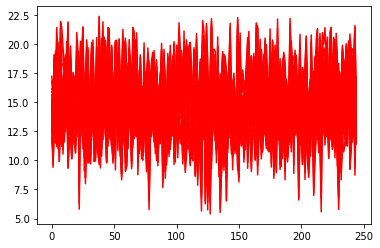

In [92]:
plt.plot(y_test, 'r', label='test')

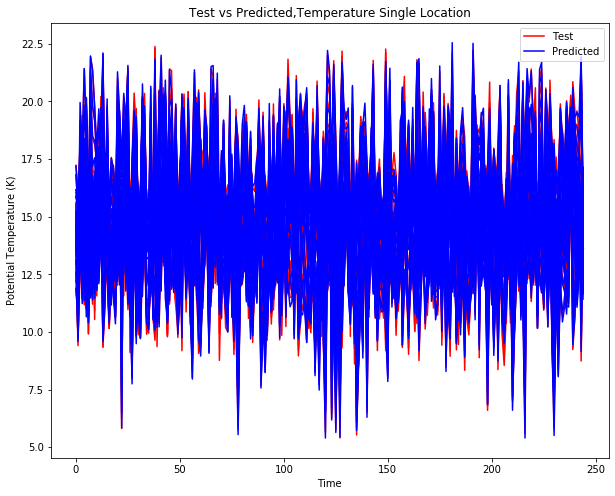

In [187]:
plt.figure(figsize=(10,8))
plt.title('Test vs Predicted,Temperature Single Location')
plt.xlabel('Time')
plt.ylabel('Potential Temperature (K)')
plt.plot(y_test, 'r',label='Test')
plt.plot(predicted, 'b',label='Predicted')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('Temperature Single Location.png')
#plt.legend()
plt.show()

In [165]:
predicted[1].shape

(29,)

In [167]:
y_test[1].shape

(29,)

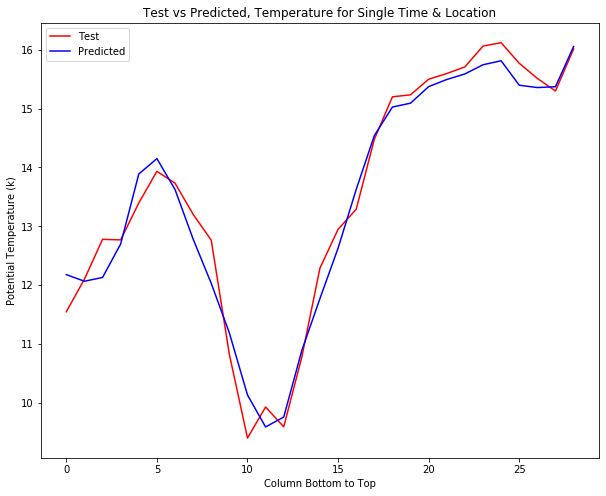

In [218]:
plt.figure(figsize=(10,8))
plt.title('Test vs Predicted, Temperature for Single Time & Location')
plt.xlabel('Column Bottom to Top')
plt.ylabel('Potential Temperature (k)')
plt.plot(y_test[1], 'r',label= 'Test')
plt.plot(predicted[1], 'b', label= 'Predicted')
plt.legend()
plt.savefig('Temperature for Single Time & Location_1.png')
plt.show()
#plt.savefig('Data/autoKeras_500_trials_1000epochs.png')

# Pressure

In [113]:
X_pressure,y_pressure=split_sequence(pressure, 3)

break
741


In [114]:
y_pressure.shape

(741, 29)

In [175]:
741/30

24.7

In [115]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pressure, y_pressure, test_size=0.33, random_state=42)

In [116]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_p = scaler.fit_transform(X_train_p.reshape(X_train_p.shape[0], -1)).reshape(X_train_p.shape)
X_test_p = scaler.transform(X_test_p.reshape(X_test_p.shape[0], -1)).reshape(X_test_p.shape)

In [117]:
def my_objective(y_pred,  y_true):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred-y_true)))

In [118]:
input_node_p = ak.Input() 
#out_node = ak.Normalization()(input_node)
#output_node1=ak.ConvBlock()(out_node)
output_node2_p = ak.RNNBlock(return_sequences=True,bidirectional=True)(input_node_p) 
#output_node = ak.DenseBlock()(output_node) #optional
#output_node = ak.SpatialReduction()(output_node) #optional
#output_node3=ak.DenseBlock(use_batchnorm=True)(output_node2)
output_node_p = ak.RegressionHead(loss=my_objective)(output_node2_p)

auto_model_p = ak.AutoModel(inputs=input_node_p,outputs=output_node_p,overwrite=True,max_trials=100)

In [119]:
auto_model_p.fit(X_train_p, y_train_p, epochs=1000)

Trial 21 Complete [00h 02m 48s]
val_loss: 93.99424743652344

Best val_loss So Far: 22.857309341430664
Total elapsed time: 00h 58m 40s
INFO:tensorflow:Oracle triggered exit
Epoch 1/1000
17/17 [==============================] - 1s 53ms/step - loss: 450.6493 - mean_squared_error: 203181.8750 - val_loss: 457.7345 - val_mean_squared_error: 209551.5938
Epoch 2/1000
17/17 [==============================] - 0s 11ms/step - loss: 448.1747 - mean_squared_error: 200956.4688 - val_loss: 453.8959 - val_mean_squared_error: 206052.2031
Epoch 3/1000
17/17 [==============================] - 0s 11ms/step - loss: 443.8531 - mean_squared_error: 197102.4219 - val_loss: 449.4245 - val_mean_squared_error: 202013.2656
Epoch 4/1000
17/17 [==============================] - 0s 11ms/step - loss: 439.5142 - mean_squared_error: 193269.8906 - val_loss: 445.3173 - val_mean_squared_error: 198338.5469
Epoch 5/1000
17/17 [==============================] - 0s 11ms/step - loss: 435.5522 - mean_squared_error: 189803.0625 - 

17/17 [==============================] - 0s 11ms/step - loss: 198.3214 - mean_squared_error: 39426.0859 - val_loss: 205.7589 - val_mean_squared_error: 42370.1016
Epoch 93/1000
17/17 [==============================] - 0s 11ms/step - loss: 196.0367 - mean_squared_error: 38524.7773 - val_loss: 203.4908 - val_mean_squared_error: 41441.8789
Epoch 94/1000
17/17 [==============================] - 0s 11ms/step - loss: 193.7663 - mean_squared_error: 37639.5000 - val_loss: 201.2374 - val_mean_squared_error: 40529.8164
Epoch 95/1000
17/17 [==============================] - 0s 11ms/step - loss: 191.5107 - mean_squared_error: 36770.1641 - val_loss: 198.9989 - val_mean_squared_error: 39633.8359
Epoch 96/1000
17/17 [==============================] - 0s 11ms/step - loss: 189.2702 - mean_squared_error: 35916.7031 - val_loss: 196.7755 - val_mean_squared_error: 38753.8516
Epoch 97/1000
17/17 [==============================] - 0s 11ms/step - loss: 187.0451 - mean_squared_error: 35079.0312 - val_loss: 194.

Epoch 185/1000
17/17 [==============================] - 0s 11ms/step - loss: 88.3989 - mean_squared_error: 7843.6826 - val_loss: 95.7172 - val_mean_squared_error: 9186.5010
Epoch 186/1000
17/17 [==============================] - 0s 11ms/step - loss: 88.2867 - mean_squared_error: 7823.6357 - val_loss: 95.5813 - val_mean_squared_error: 9160.5049
Epoch 187/1000
17/17 [==============================] - 0s 11ms/step - loss: 88.1821 - mean_squared_error: 7804.9800 - val_loss: 95.4535 - val_mean_squared_error: 9136.0898
Epoch 188/1000
17/17 [==============================] - 0s 11ms/step - loss: 88.0848 - mean_squared_error: 7787.6313 - val_loss: 95.3333 - val_mean_squared_error: 9113.1660
Epoch 189/1000
17/17 [==============================] - 0s 11ms/step - loss: 87.9943 - mean_squared_error: 7771.5024 - val_loss: 95.2204 - val_mean_squared_error: 9091.6465
Epoch 190/1000
17/17 [==============================] - 0s 11ms/step - loss: 87.9101 - mean_squared_error: 7756.5200 - val_loss: 95.114

17/17 [==============================] - 0s 11ms/step - loss: 76.0681 - mean_squared_error: 5802.3784 - val_loss: 81.4952 - val_mean_squared_error: 6653.0132
Epoch 280/1000
17/17 [==============================] - 0s 11ms/step - loss: 75.9373 - mean_squared_error: 5782.4565 - val_loss: 81.3425 - val_mean_squared_error: 6628.1250
Epoch 281/1000
17/17 [==============================] - 0s 11ms/step - loss: 75.8047 - mean_squared_error: 5762.2969 - val_loss: 81.1886 - val_mean_squared_error: 6603.1201
Epoch 282/1000
17/17 [==============================] - 0s 11ms/step - loss: 75.6710 - mean_squared_error: 5742.0146 - val_loss: 81.0351 - val_mean_squared_error: 6578.2153
Epoch 283/1000
17/17 [==============================] - 0s 11ms/step - loss: 75.5356 - mean_squared_error: 5721.5127 - val_loss: 80.8795 - val_mean_squared_error: 6553.0093
Epoch 284/1000
17/17 [==============================] - 0s 11ms/step - loss: 75.3969 - mean_squared_error: 5700.5566 - val_loss: 80.7193 - val_mean_sq

17/17 [==============================] - 0s 11ms/step - loss: 56.0644 - mean_squared_error: 3156.0007 - val_loss: 60.5170 - val_mean_squared_error: 3671.0793
Epoch 374/1000
17/17 [==============================] - 0s 11ms/step - loss: 55.8573 - mean_squared_error: 3132.7681 - val_loss: 60.2997 - val_mean_squared_error: 3644.7917
Epoch 375/1000
17/17 [==============================] - 0s 11ms/step - loss: 55.6512 - mean_squared_error: 3109.7319 - val_loss: 60.0838 - val_mean_squared_error: 3618.7588
Epoch 376/1000
17/17 [==============================] - 0s 11ms/step - loss: 55.4461 - mean_squared_error: 3086.8894 - val_loss: 59.8688 - val_mean_squared_error: 3592.9429
Epoch 377/1000
17/17 [==============================] - 0s 11ms/step - loss: 55.2417 - mean_squared_error: 3064.2153 - val_loss: 59.6544 - val_mean_squared_error: 3567.2761
Epoch 378/1000
17/17 [==============================] - 0s 11ms/step - loss: 55.0378 - mean_squared_error: 3041.6675 - val_loss: 59.4398 - val_mean_sq

17/17 [==============================] - 0s 11ms/step - loss: 41.2721 - mean_squared_error: 1711.8687 - val_loss: 44.8301 - val_mean_squared_error: 2015.4222
Epoch 468/1000
17/17 [==============================] - 0s 11ms/step - loss: 41.1502 - mean_squared_error: 1701.7998 - val_loss: 44.7063 - val_mean_squared_error: 2004.3104
Epoch 469/1000
17/17 [==============================] - 0s 11ms/step - loss: 41.0292 - mean_squared_error: 1691.8271 - val_loss: 44.5845 - val_mean_squared_error: 1993.4099
Epoch 470/1000
17/17 [==============================] - 0s 11ms/step - loss: 40.9121 - mean_squared_error: 1682.2028 - val_loss: 44.4590 - val_mean_squared_error: 1982.2151
Epoch 471/1000
17/17 [==============================] - 0s 11ms/step - loss: 40.7952 - mean_squared_error: 1672.6351 - val_loss: 44.3319 - val_mean_squared_error: 1970.9165
Epoch 472/1000
17/17 [==============================] - 0s 11ms/step - loss: 40.6790 - mean_squared_error: 1663.1460 - val_loss: 44.2040 - val_mean_sq

17/17 [==============================] - 0s 11ms/step - loss: 30.3998 - mean_squared_error: 931.5729 - val_loss: 34.2391 - val_mean_squared_error: 1176.2601
Epoch 562/1000
17/17 [==============================] - 0s 11ms/step - loss: 30.2988 - mean_squared_error: 925.4401 - val_loss: 34.1803 - val_mean_squared_error: 1172.2194
Epoch 563/1000
17/17 [==============================] - 0s 11ms/step - loss: 30.2220 - mean_squared_error: 920.7392 - val_loss: 34.0586 - val_mean_squared_error: 1163.9365
Epoch 564/1000
17/17 [==============================] - 0s 11ms/step - loss: 30.1244 - mean_squared_error: 914.8614 - val_loss: 33.9984 - val_mean_squared_error: 1159.8091
Epoch 565/1000
17/17 [==============================] - 0s 11ms/step - loss: 30.0455 - mean_squared_error: 910.0738 - val_loss: 33.8827 - val_mean_squared_error: 1151.9673
Epoch 566/1000
17/17 [==============================] - 0s 11ms/step - loss: 29.9430 - mean_squared_error: 903.9766 - val_loss: 33.8073 - val_mean_squared_

Epoch 609/1000
17/17 [==============================] - 0s 11ms/step - loss: 26.6062 - mean_squared_error: 714.9424 - val_loss: 30.4537 - val_mean_squared_error: 931.6096
Epoch 610/1000
17/17 [==============================] - 0s 11ms/step - loss: 26.5456 - mean_squared_error: 711.7242 - val_loss: 30.3859 - val_mean_squared_error: 927.5181
Epoch 611/1000
17/17 [==============================] - 0s 11ms/step - loss: 26.4836 - mean_squared_error: 708.4103 - val_loss: 30.3245 - val_mean_squared_error: 923.8371
Epoch 612/1000
17/17 [==============================] - 0s 11ms/step - loss: 26.4200 - mean_squared_error: 705.0327 - val_loss: 30.2626 - val_mean_squared_error: 920.1283
Epoch 613/1000
17/17 [==============================] - 0s 11ms/step - loss: 26.3517 - mean_squared_error: 701.4077 - val_loss: 30.1885 - val_mean_squared_error: 915.6614
Epoch 614/1000
17/17 [==============================] - 0s 11ms/step - loss: 26.2796 - mean_squared_error: 697.6029 - val_loss: 30.1141 - val_mea

Epoch 657/1000
17/17 [==============================] - 0s 11ms/step - loss: 23.6470 - mean_squared_error: 565.8737 - val_loss: 27.5398 - val_mean_squared_error: 763.0889
Epoch 658/1000
17/17 [==============================] - 0s 11ms/step - loss: 23.6685 - mean_squared_error: 566.7354 - val_loss: 27.3848 - val_mean_squared_error: 754.7880
Epoch 659/1000
17/17 [==============================] - 0s 11ms/step - loss: 23.5897 - mean_squared_error: 562.9459 - val_loss: 27.3296 - val_mean_squared_error: 751.7238
Epoch 660/1000
17/17 [==============================] - 0s 11ms/step - loss: 23.5159 - mean_squared_error: 559.7022 - val_loss: 27.4981 - val_mean_squared_error: 760.8853
Epoch 661/1000
17/17 [==============================] - 0s 11ms/step - loss: 23.5816 - mean_squared_error: 562.4193 - val_loss: 27.2815 - val_mean_squared_error: 749.2052
Epoch 662/1000
17/17 [==============================] - 0s 11ms/step - loss: 23.3965 - mean_squared_error: 553.9108 - val_loss: 27.2503 - val_mea

Epoch 705/1000
17/17 [==============================] - 0s 11ms/step - loss: 21.1183 - mean_squared_error: 452.2784 - val_loss: 24.8392 - val_mean_squared_error: 623.0422
Epoch 706/1000
17/17 [==============================] - 0s 11ms/step - loss: 21.0700 - mean_squared_error: 450.2457 - val_loss: 24.7926 - val_mean_squared_error: 620.7533
Epoch 707/1000
17/17 [==============================] - 0s 11ms/step - loss: 21.0223 - mean_squared_error: 448.2291 - val_loss: 24.7499 - val_mean_squared_error: 618.6536
Epoch 708/1000
17/17 [==============================] - 0s 11ms/step - loss: 20.9764 - mean_squared_error: 446.2931 - val_loss: 24.6997 - val_mean_squared_error: 616.1991
Epoch 709/1000
17/17 [==============================] - 0s 11ms/step - loss: 20.9286 - mean_squared_error: 444.2919 - val_loss: 24.6557 - val_mean_squared_error: 614.0534
Epoch 710/1000
17/17 [==============================] - 0s 11ms/step - loss: 20.8833 - mean_squared_error: 442.3926 - val_loss: 24.6023 - val_mea

Epoch 753/1000
17/17 [==============================] - 0s 11ms/step - loss: 19.3733 - mean_squared_error: 381.6125 - val_loss: 23.0356 - val_mean_squared_error: 538.6474
Epoch 754/1000
17/17 [==============================] - 0s 11ms/step - loss: 19.3215 - mean_squared_error: 379.6474 - val_loss: 23.0573 - val_mean_squared_error: 539.5440
Epoch 755/1000
17/17 [==============================] - 0s 11ms/step - loss: 19.3542 - mean_squared_error: 380.9502 - val_loss: 22.8886 - val_mean_squared_error: 532.0389
Epoch 756/1000
17/17 [==============================] - 0s 11ms/step - loss: 19.2251 - mean_squared_error: 376.0158 - val_loss: 22.9126 - val_mean_squared_error: 532.9576
Epoch 757/1000
17/17 [==============================] - 0s 11ms/step - loss: 19.2994 - mean_squared_error: 378.8323 - val_loss: 22.7309 - val_mean_squared_error: 525.0744
Epoch 758/1000
17/17 [==============================] - 0s 11ms/step - loss: 19.1466 - mean_squared_error: 372.9638 - val_loss: 22.6883 - val_mea

Epoch 801/1000
17/17 [==============================] - 0s 11ms/step - loss: 17.7354 - mean_squared_error: 320.8272 - val_loss: 21.3131 - val_mean_squared_error: 463.6607
Epoch 802/1000
17/17 [==============================] - 0s 11ms/step - loss: 17.7209 - mean_squared_error: 320.3837 - val_loss: 21.2767 - val_mean_squared_error: 462.5181
Epoch 803/1000
17/17 [==============================] - 0s 11ms/step - loss: 17.6548 - mean_squared_error: 318.0036 - val_loss: 21.2369 - val_mean_squared_error: 460.5307
Epoch 804/1000
17/17 [==============================] - 0s 11ms/step - loss: 17.6571 - mean_squared_error: 318.1083 - val_loss: 21.2181 - val_mean_squared_error: 459.9673
Epoch 805/1000
17/17 [==============================] - 0s 11ms/step - loss: 17.5769 - mean_squared_error: 315.2964 - val_loss: 21.2393 - val_mean_squared_error: 460.9018
Epoch 806/1000
17/17 [==============================] - 0s 11ms/step - loss: 17.6397 - mean_squared_error: 317.5594 - val_loss: 21.1084 - val_mea

Epoch 849/1000
17/17 [==============================] - 0s 11ms/step - loss: 16.5703 - mean_squared_error: 280.8067 - val_loss: 19.9122 - val_mean_squared_error: 408.1671
Epoch 850/1000
17/17 [==============================] - 0s 11ms/step - loss: 16.3756 - mean_squared_error: 274.5936 - val_loss: 19.7688 - val_mean_squared_error: 402.4732
Epoch 851/1000
17/17 [==============================] - 0s 11ms/step - loss: 16.3024 - mean_squared_error: 272.3181 - val_loss: 19.7214 - val_mean_squared_error: 400.7103
Epoch 852/1000
17/17 [==============================] - 0s 11ms/step - loss: 16.2641 - mean_squared_error: 271.0758 - val_loss: 19.7448 - val_mean_squared_error: 401.5883
Epoch 853/1000
17/17 [==============================] - 0s 11ms/step - loss: 16.2428 - mean_squared_error: 270.4072 - val_loss: 19.6881 - val_mean_squared_error: 399.4962
Epoch 854/1000
17/17 [==============================] - 0s 11ms/step - loss: 16.2495 - mean_squared_error: 270.6914 - val_loss: 19.6731 - val_mea

Epoch 897/1000
17/17 [==============================] - 0s 11ms/step - loss: 15.5077 - mean_squared_error: 246.8458 - val_loss: 18.6874 - val_mean_squared_error: 362.5245
Epoch 898/1000
17/17 [==============================] - 0s 11ms/step - loss: 15.3815 - mean_squared_error: 243.1658 - val_loss: 18.8284 - val_mean_squared_error: 367.6218
Epoch 899/1000
17/17 [==============================] - 0s 11ms/step - loss: 15.3357 - mean_squared_error: 241.8125 - val_loss: 18.7016 - val_mean_squared_error: 363.1005
Epoch 900/1000
17/17 [==============================] - 0s 11ms/step - loss: 15.2830 - mean_squared_error: 240.1603 - val_loss: 18.6113 - val_mean_squared_error: 359.7631
Epoch 901/1000
17/17 [==============================] - 0s 11ms/step - loss: 15.1915 - mean_squared_error: 237.4964 - val_loss: 18.6103 - val_mean_squared_error: 359.9553
Epoch 902/1000
17/17 [==============================] - 0s 11ms/step - loss: 15.1376 - mean_squared_error: 235.8430 - val_loss: 18.5217 - val_mea

Epoch 945/1000
17/17 [==============================] - 0s 11ms/step - loss: 14.4031 - mean_squared_error: 214.1646 - val_loss: 17.7340 - val_mean_squared_error: 329.5672
Epoch 946/1000
17/17 [==============================] - 0s 11ms/step - loss: 14.3237 - mean_squared_error: 212.0230 - val_loss: 17.8188 - val_mean_squared_error: 332.8544
Epoch 947/1000
17/17 [==============================] - 0s 11ms/step - loss: 14.4376 - mean_squared_error: 215.0279 - val_loss: 17.7760 - val_mean_squared_error: 330.8523
Epoch 948/1000
17/17 [==============================] - 0s 11ms/step - loss: 14.3161 - mean_squared_error: 211.7493 - val_loss: 17.7127 - val_mean_squared_error: 328.9492
Epoch 949/1000
17/17 [==============================] - 0s 11ms/step - loss: 14.2876 - mean_squared_error: 210.7773 - val_loss: 17.6397 - val_mean_squared_error: 325.9879
Epoch 950/1000
17/17 [==============================] - 0s 11ms/step - loss: 14.2505 - mean_squared_error: 209.7783 - val_loss: 17.5677 - val_mea

Epoch 993/1000
17/17 [==============================] - 0s 11ms/step - loss: 13.5377 - mean_squared_error: 190.0880 - val_loss: 16.9591 - val_mean_squared_error: 303.1862
Epoch 994/1000
17/17 [==============================] - 0s 11ms/step - loss: 13.5794 - mean_squared_error: 191.1820 - val_loss: 17.1626 - val_mean_squared_error: 310.5562
Epoch 995/1000
17/17 [==============================] - 0s 11ms/step - loss: 13.6643 - mean_squared_error: 193.1915 - val_loss: 16.9207 - val_mean_squared_error: 302.0084
Epoch 996/1000
17/17 [==============================] - 0s 11ms/step - loss: 13.5800 - mean_squared_error: 191.0813 - val_loss: 17.0055 - val_mean_squared_error: 304.9464
Epoch 997/1000
17/17 [==============================] - 0s 11ms/step - loss: 13.5024 - mean_squared_error: 188.9828 - val_loss: 16.8482 - val_mean_squared_error: 299.8220
Epoch 998/1000
17/17 [==============================] - 0s 11ms/step - loss: 13.4945 - mean_squared_error: 188.7067 - val_loss: 16.8199 - val_mea

In [120]:
predicted_p=auto_model_p.predict(X_test_p)

In [138]:
r2_p = r2_score(predicted_p,y_test_p)
rmse_p = sqrt(mean_squared_error(predicted_p,y_test_p))

In [139]:
print(r2_p)
print(rmse_p)

0.9555738110568762
18.530180361467494


In [157]:
y_test_p.min()

-23.972656

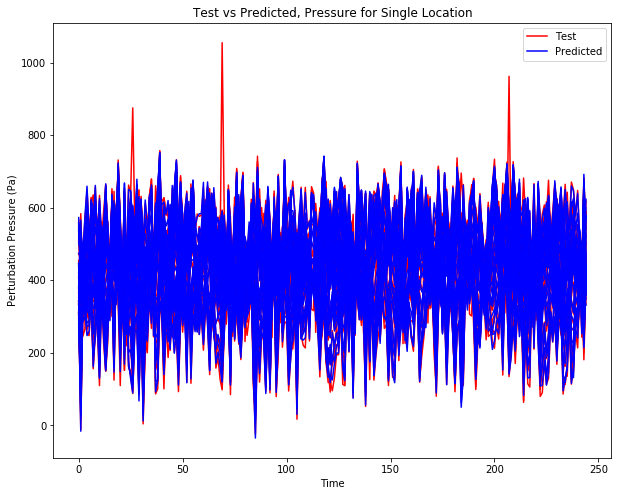

In [219]:
plt.figure(figsize=(10,8))
plt.title('Test vs Predicted, Pressure for Single Location')
plt.xlabel('Time')
plt.ylabel('Perturbation Pressure (Pa)')
plt.plot(y_test_p, 'r',label='Test')
plt.plot(predicted_p, 'b',label='Predicted')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.legend()
plt.savefig('Pressure for Single Location.png')
plt.show()

In [163]:
y_test_p[4].shape

(245, 29)

In [161]:
predicted_p[4].shape

(29,)

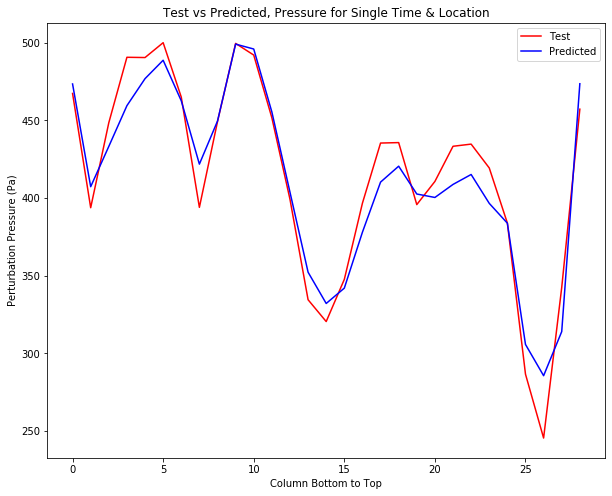

In [223]:
plt.figure(figsize=(10,8))
plt.title('Test vs Predicted, Pressure for Single Time & Location')
plt.xlabel('Column Bottom to Top')
plt.ylabel('Perturbation Pressure (Pa)')
plt.plot(y_test_p[2], 'r', label='Test')
plt.plot(predicted_p[2], 'b', Label = 'Predicted')
plt.legend()
plt.savefig('Pressure for Single Time & Location_1.png')
plt.show()

In [127]:
model_p = auto_model_p.export_model()

In [208]:
f = open("Pressure_Model_config.txt", "w")
f.write(str(model_p.get_config()))
f.close()

# Plotting Map

In [227]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import argparse
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [229]:
minLat=-20
maxLat=80
minLon=-180
maxLon=30

In [248]:

pre = list(np.concatenate(predicted_p).flat)

In [251]:
predicted_p.shape

(245, 29)

In [250]:
len(latitude)

841

In [255]:
data['longitude'][1][1]

-120.32599

In [247]:
data['latitude'][1][1]


4.171837

In [260]:
data[temperature][0][1][1]

TypeError: unhashable type: 'list'

In [281]:
temperature_0=[]
pressure_0=[]
for lat in range(29):
    for lon in range(29):
        temperature_0.append(data['temperature'][0][lat][lon][0])
        pressure_0.append(data['pressure'][0][lat][lon][0])

In [282]:
len(temperature_0)

841

In [256]:
data['temperature'][0][1][1]

masked_array(data=[1.513763427734375, 1.621246337890625,
                   1.207061767578125, 1.415985107421875,
                   1.176849365234375, 1.50177001953125, 1.75238037109375,
                   1.259918212890625, 1.272308349609375,
                   1.762054443359375, 1.517425537109375, 1.42547607421875,
                   1.40802001953125, 1.50537109375, 1.768096923828125,
                   1.732452392578125, 1.596923828125, 2.054595947265625,
                   1.686553955078125, 1.2777099609375, 0.917999267578125,
                   0.93231201171875, 1.00274658203125, 0.28924560546875,
                   1.227935791015625, 10.6566162109375, 3.727020263671875,
                   1.660888671875, -1.670196533203125],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, 

In [237]:
latitude = list(np.concatenate(data['latitude']).flat)
longitude = list(np.concatenate(data['longitude']).flat)

In [269]:
len(latitude)

841

841


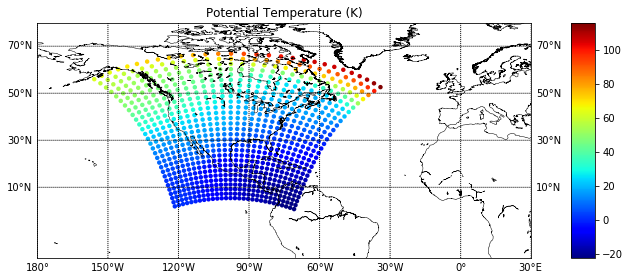

In [285]:
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', resolution='l',llcrnrlon=minLon, llcrnrlat=minLat, urcrnrlon=maxLon, urcrnrlat=maxLat,lat_0=20.,lon_0=-10.,lat_ts=10.)
#'cyl'
#m = Basemap(projection='cyl', resolution='l',llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49, lat_1=32,lat_2=45,lon_0=-95)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
#GET OCO2 DATA
'''# filter to get oco2 and gosat data seperately
oco2_data = data_set[data_set['dstype'].str.contains("oco2")]
print('Number of OCO2 rows= ' + str(len(oco2_data)))
'''
#    plt.clim(380, 420)
lon_oco2 = np.array(longitude)
lat_oco2 = np.array(latitude)
yrecon_oco2 = np.array(temperature_0)

print(len(yrecon_oco2))
m.scatter(lon_oco2, lat_oco2, c=yrecon_oco2, s=20, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
m.colorbar(mappable=None, location='right', size='5%', pad='8%', fig=None, ax=None)
plt.title("Potential Temperature (K)")
plt.savefig('Potential_Temperature.png')
plt.show()


841


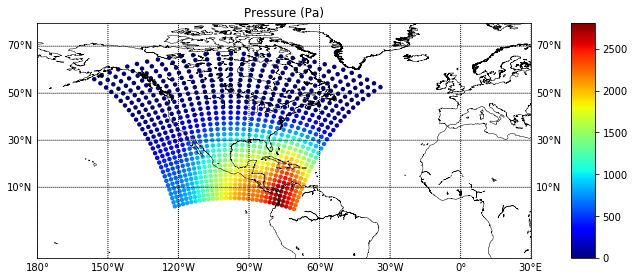

In [286]:
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', resolution='l',llcrnrlon=minLon, llcrnrlat=minLat, urcrnrlon=maxLon, urcrnrlat=maxLat,lat_0=20.,lon_0=-10.,lat_ts=10.)
#'cyl'
#m = Basemap(projection='cyl', resolution='l',llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49, lat_1=32,lat_2=45,lon_0=-95)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
#GET OCO2 DATA
'''# filter to get oco2 and gosat data seperately
oco2_data = data_set[data_set['dstype'].str.contains("oco2")]
print('Number of OCO2 rows= ' + str(len(oco2_data)))
'''
#    plt.clim(380, 420)
lon_oco2 = np.array(longitude)
lat_oco2 = np.array(latitude)
yrecon_oco2 = np.array(pressure_0)

print(len(yrecon_oco2))
m.scatter(lon_oco2, lat_oco2, c=yrecon_oco2, s=20, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
m.colorbar(mappable=None, location='right', size='5%', pad='8%', fig=None, ax=None)
plt.title("Pressure (Pa)")
plt.savefig('Pressure (Pa).png')
plt.show()

In [254]:
data['temperature'][1].shape

(29, 29, 29)

In [253]:
data['temperature'].shape

(744, 29, 29, 29)

In [278]:
len(data['times'])

744

In [279]:
data['latitude'].shape

(29, 29)

In [77]:
d = 0.75
#activate='LeakyReLu'   # change to act funct if needed e.g sigmoid
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#model.add(tf.keras.layers.LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dropout(d))
model.add(tf.keras.layers.LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dropout(d))
#model.add(Dropout(d))
#model.add(LSTM(FLAGS.n_hidden, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activate, return_sequences=True))
#model.add(LSTM(FLAGS.n_hidden, input_shape=(train_X.shape[1], train_X.shape[2]), activation=activate, return_sequences=False))
model.add(tf.keras.layers.Dense(1))
#sgd = tf.keras.optimizers.SGD(lr=0.0015, decay=1e-6, momentum=0.9, nesterov=True)
adam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adam')
model.compile(loss=my_objective, optimizer=adam)

AttributeError: 'RNNBlock' object has no attribute 'fit'

In [20]:
flat_temperature =list(np.concatenate(temperature).flat)
flat_pressure = list(np.concatenate(pressure).flat)
flat_xWind = list(np.concatenate(xWind).flat)
flat_yWind = list(np.concatenate(yWind).flat)
flat_zWind =list(np.concatenate(zWind).flat)
flat_no2= list(np.concatenate(no2).flat)
flat_no = list(np.concatenate(no).flat)
flat_o3 = list(np.concatenate(o3).flat)
flat_hno3 = list(np.concatenate(hno3).flat)
flat_h2o2 = list(np.concatenate(h2o2).flat)

In [21]:
df = pd.DataFrame(list(zip(flat_temperature,flat_pressure,flat_xWind,flat_yWind,flat_zWind,flat_no2, flat_no,flat_o3,flat_hno3,flat_h2o2)),columns =['temperature','pressure','xWind','yWind','zWind','no2', 'no','o3','hno3','h2o2'])

In [22]:
df.shape

(21576, 10)

In [23]:
df.head()

,temperature,pressure,xWind,yWind,zWind,no2,no,o3,hno3,h2o2
0,16.823853,556.183594,7.196385,-1.436874,-0.010515,0.000039,0.000013,0.047917,0.000108,0.001103
1,15.947968,530.468750,5.494700,-3.421114,-0.010478,0.000050,0.000017,0.049584,0.000178,0.000992
2,14.936035,493.621094,6.351919,-4.918729,-0.029001,0.000064,0.000021,0.051173,0.000260,0.000888
3,14.047363,478.058594,6.461870,-3.480983,-0.002807,0.000075,0.000025,0.052018,0.000320,0.000834
4,13.439850,445.917969,6.308065,-3.467795,-0.011003,0.000079,0.000026,0.052187,0.000338,0.000827


In [8]:
flat_no2= list(np.concatenate(data['no2']).flat)
flat_no = list(np.concatenate(data['no']).flat)
flat_o3 = list(np.concatenate(data['o3']).flat)
flat_hno3 = list(np.concatenate(data['hno3']).flat)
flat_h2o2 = list(np.concatenate(data['h2o2']).flat)

In [9]:
df = pd.DataFrame(list(zip(flat_no2, flat_no,flat_o3,flat_hno3,flat_h2o2)),columns =['no2', 'no','o3','hno3','h2o2'])

In [10]:
df.shape

(18145416, 5)

In [19]:
18145416 - 121945

18023471

In [20]:
df_train = df.iloc[:18023471,:]
df_test = df.iloc[18023471:,:]

In [33]:
df_train.iloc[:,-1:]

,h2o2
0,0.001380
1,0.001380
2,0.001379
3,0.001379
4,0.001379
...,...
18023466,0.000815
18023467,0.000815
18023468,0.000815
18023469,0.000815


In [34]:
X_train = df_train.iloc[:,:4]
y_train = df_train.iloc[:,-1:]
X_test = df_test.iloc[:,:4]
y_test = df_train.iloc[:,-1:]

In [39]:
X_train.shape

(18023471, 4)

In [ ]:
learning_rate=0.0001
epochs = 10
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(4,), kernel_initializer='normal', activation='relu', kernel_regularizer=l2(0.1),
            activity_regularizer=l1(0.1)))
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(100, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal'))

# Compile model
#sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer='adam')
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_split=0.5, verbose=2)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_split=0.5, verbose=2)
# make a prediction
predicted = model.predict(X_test)

Epoch 1/10
563234/563234 - 878s - loss: 6.3459e-06 - val_loss: 1.5275e-07
Epoch 2/10
563234/563234 - 880s - loss: 1.0823e-07 - val_loss: 8.6608e-08
Epoch 3/10
563234/563234 - 878s - loss: 1.0818e-07 - val_loss: 1.1065e-07
Epoch 4/10
563234/563234 - 875s - loss: 1.0817e-07 - val_loss: 1.0361e-07
Epoch 5/10
563234/563234 - 875s - loss: 1.0825e-07 - val_loss: 1.0830e-07
Epoch 6/10
563234/563234 - 877s - loss: 1.0824e-07 - val_loss: 9.3466e-08
Epoch 7/10


In [41]:
predicted

array([[0.00077412],
       [0.00077412],
       [0.00077412],
       ...,
       [0.00077412],
       [0.00077412],
       [0.00077412]], dtype=float32)

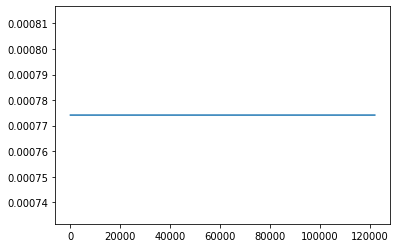

In [42]:
plt.plot(predicted)

In [36]:
X_train.shape

(18023471, 4)

In [ ]:
X_train = df_train.i

In [21]:
df_train.shape

(18023471, 5)

In [22]:
df_test.shape

(121945, 5)